In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

('Shape of data: ', (506L, 13L), (506L,))
('Feature names: ', array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='|S7'))


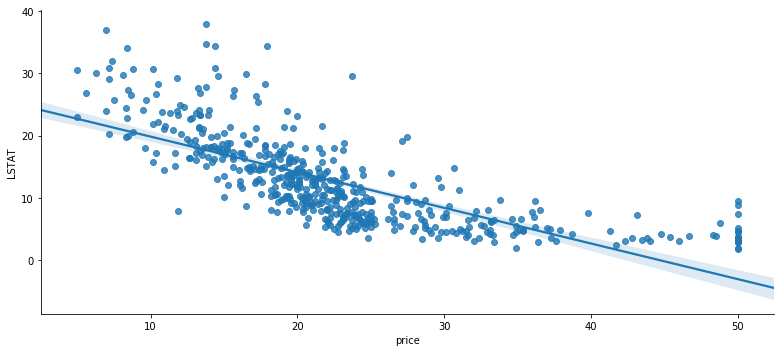

In [6]:
from sklearn import datasets
boston = datasets.load_boston()
X_boston, y_boston = boston.data, boston.target
print('Shape of data: ', X_boston.shape, y_boston.shape)
print('Feature names: ', boston.feature_names)

df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['price'] = boston.target
sns.lmplot("price", "LSTAT",df_boston, aspect=2.2)

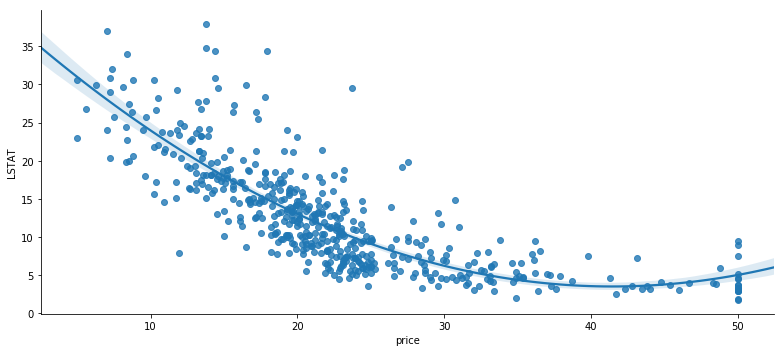

In [8]:
sns.lmplot("price", "LSTAT", df_boston, order=2, aspect=2.2)

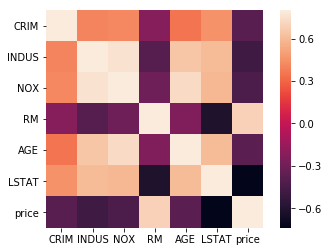

In [9]:
indexes = [0,2,4,5,6,12]
df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
df2['price'] = boston.target
corrmat = df2.corr()
sns.heatmap(corrmat, vmax = .8, square = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000105212E8>,
      dtype=object)

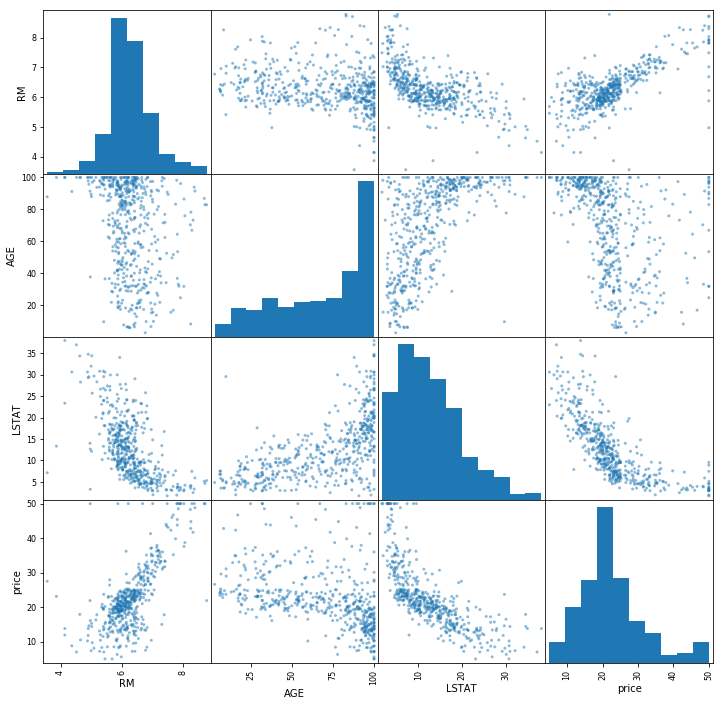

In [11]:
indexes = [5,6,12]
df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
df2['price'] = boston.target
pd.plotting.scatter_matrix(df2, figsize = (12.0, 12.0))

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

train_size = X_boston.shape[0]/2
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Training and testing set size: ', X_train.shape, X_test.shape)

regr = LinearRegression()
regr.fit(X_train, y_train)
print('Coeff and intercept: ', regr.coef_, regr.intercept_)
print('Testing Score: ', regr.score(X_test, y_test))
print('Training MSE: ', np.mean((regr.predict(X_train) - y_train)**2))
print('Testing MSE: ', np.mean((regr.predict(X_test) - y_test)**2))

('Training and testing set size: ', (253L, 13L), (253L, 13L))
('Coeff and intercept: ', array([ 1.20133313,  0.02449686,  0.00999508,  0.42548672, -8.44272332,
        8.87767164, -0.04850422, -1.11980855,  0.20377571, -0.01597724,
       -0.65974775,  0.01777057, -0.11480104]), -10.017430582945035)
('Testing Score: ', -2.252734342392476)
('Training MSE: ', 9.987517325463738)
('Testing MSE: ', 303.43686292658475)


In [30]:
regr_lasso = linear_model.Lasso(alpha = .3)
regr_lasso.fit(X_train, y_train)

print('Coeff and intercept: ', regr_lasso.coef_, regr_lasso.intercept_)
print('Testing score: ', regr_lasso.score(X_test, y_test))
print('Training MSE: ', np.mean((regr_lasso.predict(X_train) - y_train)**2))
print('Testing MSE: ', np.mean((regr_lasso.predict(X_test) - y_test)**2))

('Coeff and intercept: ', array([ 0.        ,  0.01996512, -0.        ,  0.        , -0.        ,
        7.69894744, -0.03444803, -0.79380636,  0.0735163 , -0.0143421 ,
       -0.66768539,  0.01547437, -0.22181817]), -6.1832418361483725)
('Testing score: ', 0.5011275290212163)
('Training MSE: ', 10.73431100954422)
('Testing MSE: ', 46.538168094875644)


In [31]:
ind = np.argsort(np.abs(regr_lasso.coef_))
print('Ordered variable (from less to more important): ', boston.feature_names[ind])

('Ordered variable (from less to more important): ', array(['CRIM', 'INDUS', 'CHAS', 'NOX', 'TAX', 'B', 'ZN', 'AGE', 'RAD',
       'LSTAT', 'PTRATIO', 'DIS', 'RM'], dtype='|S7'))


In [33]:
import sklearn.feature_selection as fs
selector = fs.SelectKBest(score_func = fs.f_regression, k = 5)

selector.fit_transform(X_train, y_train)
selector.fit(X_train, y_train)
print('Selected features: ', zip(selector.get_support(), boston.feature_names))

('Selected features: ', [(False, 'CRIM'), (False, 'ZN'), (True, 'INDUS'), (False, 'CHAS'), (False, 'NOX'), (True, 'RM'), (True, 'AGE'), (False, 'DIS'), (False, 'RAD'), (False, 'TAX'), (True, 'PTRATIO'), (False, 'B'), (True, 'LSTAT')])


Text(0,0.5,'Predicted price ($1000s)')

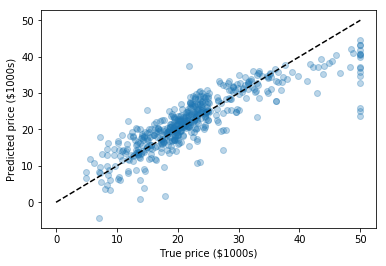

In [34]:
clf = LinearRegression()
clf.fit(boston.data, boston.target)
predicted = clf.predict(boston.data)

plt.scatter(boston.target, predicted, alpha = 0.3)
plt.plot([0,50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')